In [1]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
np.set_printoptions(linewidth = 200)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0


In [4]:

def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()



In [5]:
def create_model(my_learning_rate):
  
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  return epochs, hist    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
12/12 [==============================] - 2s 82ms/step - loss: 1.6882 - accuracy: 0.4680 - val_loss: 0.9609 - val_accuracy: 0.7641
Epoch 2/50
12/12 [==============================] - 1s 43ms/step - loss: 0.8839 - accuracy: 0.7364 - val_loss: 0.5280 - val_accuracy: 0.8613
Epoch 3/50
12/12 [==============================] - 1s 48ms/step - loss: 0.6181 - accuracy: 0.8131 - val_loss: 0.4039 - val_accuracy: 0.8917
Epoch 4/50
12/12 [==============================] - 0s 40ms/step - loss: 0.5040 - accuracy: 0.8525 - val_loss: 0.3460 - val_accuracy: 0.9045
Epoch 5/50
12/12 [==============================] - 0s 42ms/step - loss: 0.4480 - accuracy: 0.8698 - val_loss: 0.3116 - val_accuracy: 0.9152
Epoch 6/50
12/12 [==============================] - 1s 43ms/step - loss: 0.4068 - accuracy: 0.8818 - val_loss: 0.2883 - val_accuracy: 0.9231
Epoch 7/50
12/12 [==============================] - 1s 42ms/step - loss: 0.3831 - accuracy: 0.8891 - val_loss: 0.2692 - val_accuracy: 0.9283
Epoch 8/50
12

[0.1480410099029541, 0.9569000005722046]

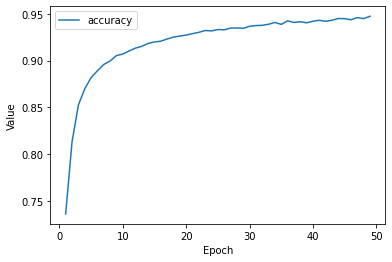

In [6]:

learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

my_model = create_model(learning_rate)
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)